# Import Library

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load Datasets

In [173]:
df = pd.read_csv("data-final-clean.csv", delimiter=',')
df.drop(df.columns[[50]], axis = 1, inplace = True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
874362,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
874363,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
874364,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


## Reverse Items

The dataset includes questions with reverse items, like EXT2 "I don't talk a lot" in the Extraversion scale. Assigning higher scores to these questions should indicate lower levels of extraversion. Therefore, the reverse items will be encoded accordingly.

In [174]:
#re-encoding reverse items

reverse_cols = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10', 
                'EST2', 'EST4', 
                'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                'OPN2', 'OPN4', 'OPN6']

for col in reverse_cols:
    df[col] = 6 - df[col].values

In [175]:
# to check whether the reverse items re-coded correctly

df[['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
    'EST2', 'EST4', 
    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
    'OPN2', 'OPN4', 'OPN6']].head()

,EXT2,EXT4,EXT6,EXT8,EXT10,EST2,EST4,AGR1,AGR3,AGR5,AGR7,CSN2,CSN4,CSN6,CSN8,OPN2,OPN4,OPN6
0,5.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,5.0
1,1.0,2.0,3.0,1.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,5.0
2,3.0,2.0,4.0,3.0,1.0,2.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0
3,4.0,3.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0
4,3.0,3.0,3.0,1.0,2.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# PREPROCESSING

## Null Value Checking

In [176]:
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  874366


## Choose 25 of 50 Quests

In [177]:
columns = df.columns
for idx, column in enumerate(columns):
    print(f"Column index: {idx}, Column name: {column}")

Column index: 0, Column name: EXT1
Column index: 1, Column name: EXT2
Column index: 2, Column name: EXT3
Column index: 3, Column name: EXT4
Column index: 4, Column name: EXT5
Column index: 5, Column name: EXT6
Column index: 6, Column name: EXT7
Column index: 7, Column name: EXT8
Column index: 8, Column name: EXT9
Column index: 9, Column name: EXT10
Column index: 10, Column name: EST1
Column index: 11, Column name: EST2
Column index: 12, Column name: EST3
Column index: 13, Column name: EST4
Column index: 14, Column name: EST5
Column index: 15, Column name: EST6
Column index: 16, Column name: EST7
Column index: 17, Column name: EST8
Column index: 18, Column name: EST9
Column index: 19, Column name: EST10
Column index: 20, Column name: AGR1
Column index: 21, Column name: AGR2
Column index: 22, Column name: AGR3
Column index: 23, Column name: AGR4
Column index: 24, Column name: AGR5
Column index: 25, Column name: AGR6
Column index: 26, Column name: AGR7
Column index: 27, Column name: AGR8


In [178]:
columns_to_drop = [1, 3, 5, 7, 9, 
                   11, 13, 14, 17, 18,
                   20, 21, 22, 24, 26,
                   31, 32, 33, 35, 37, 
                   41, 42, 43, 45, 46]

df.drop(df.columns[[columns_to_drop]], axis = 1, inplace = True)
df

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,5.0,5.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,3.0,5.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,2.0,4.0
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,3.0,3.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [179]:
quest_df = (df.iloc[:, 0:50])
quest_df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,5.0,5.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,3.0,5.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,2.0,4.0
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,3.0,3.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [180]:
# Adding columns

val_df = df.copy()

def sum_columns(dataframe, columns, new_column_name):
    dataframe.loc[:, new_column_name] = dataframe.loc[:, columns].sum(axis=1)
    return dataframe

val_df = sum_columns(val_df, val_df.columns[0:5], 'extraversion')
val_df = sum_columns(val_df, val_df.columns[5:10], 'emotional_stability')
val_df = sum_columns(val_df, val_df.columns[10:15], 'agreeableness')
val_df = sum_columns(val_df, val_df.columns[15:20], 'conscientiousness')
val_df = sum_columns(val_df, val_df.columns[21:25], 'openness')

# Switching columns

val_df.insert(val_df.columns.get_loc('EXT9') + 1, 'extraversion', val_df.pop('extraversion'))
val_df.insert(val_df.columns.get_loc('EST10') + 1, 'emotional_stability', val_df.pop('emotional_stability'))
val_df.insert(val_df.columns.get_loc('AGR10') + 1, 'agreeableness', val_df.pop('agreeableness'))
val_df.insert(val_df.columns.get_loc('CSN10') + 1, 'conscientiousness', val_df.pop('conscientiousness'))
val_df.insert(val_df.columns.get_loc('OPN10') + 1, 'openness', val_df.pop('openness'))

val_df

,EXT1,EXT3,EXT5,EXT7,EXT9,extraversion,EST1,EST3,EST6,EST7,EST10,emotional_stability,AGR4,AGR6,AGR8,AGR9,AGR10,agreeableness,CSN1,CSN5,CSN7,CSN9,CSN10,conscientiousness,OPN1,OPN5,OPN8,OPN9,OPN10,openness
0,4.0,5.0,5.0,5.0,4.0,23.0,1.0,4.0,2.0,2.0,2.0,11.0,4.0,3.0,4.0,3.0,4.0,18.0,3.0,2.0,4.0,4.0,4.0,17.0,5.0,4.0,3.0,4.0,5.0,16.0
1,3.0,3.0,3.0,2.0,1.0,12.0,2.0,4.0,1.0,2.0,1.0,10.0,5.0,5.0,4.0,5.0,3.0,22.0,3.0,3.0,3.0,5.0,3.0,17.0,1.0,3.0,2.0,5.0,3.0,13.0
2,2.0,4.0,3.0,1.0,2.0,12.0,4.0,4.0,2.0,2.0,3.0,15.0,4.0,4.0,4.0,4.0,3.0,19.0,4.0,3.0,4.0,4.0,2.0,17.0,5.0,4.0,3.0,4.0,4.0,15.0
3,2.0,2.0,4.0,2.0,1.0,11.0,3.0,3.0,2.0,2.0,3.0,13.0,4.0,4.0,4.0,3.0,4.0,19.0,2.0,1.0,2.0,1.0,4.0,10.0,4.0,3.0,4.0,3.0,3.0,13.0
4,3.0,3.0,5.0,3.0,3.0,17.0,1.0,5.0,1.0,1.0,2.0,10.0,5.0,3.0,5.0,5.0,3.0,21.0,5.0,3.0,5.0,5.0,5.0,23.0,5.0,5.0,3.0,5.0,5.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,18.0,4.0,3.0,3.0,4.0,3.0,17.0,5.0,4.0,4.0,4.0,4.0,21.0,2.0,4.0,4.0,3.0,3.0,16.0,2.0,4.0,2.0,2.0,4.0,12.0
874362,4.0,4.0,3.0,4.0,3.0,18.0,4.0,5.0,5.0,4.0,5.0,23.0,4.0,5.0,3.0,5.0,3.0,20.0,3.0,3.0,2.0,2.0,3.0,13.0,4.0,5.0,4.0,5.0,4.0,18.0
874363,4.0,4.0,5.0,4.0,4.0,21.0,3.0,4.0,2.0,4.0,1.0,14.0,3.0,3.0,4.0,3.0,5.0,18.0,4.0,1.0,1.0,1.0,4.0,11.0,5.0,4.0,5.0,4.0,5.0,18.0
874364,2.0,3.0,2.0,1.0,2.0,10.0,4.0,4.0,4.0,2.0,4.0,18.0,4.0,4.0,4.0,4.0,3.0,19.0,4.0,2.0,4.0,4.0,4.0,18.0,5.0,3.0,5.0,5.0,3.0,16.0


### Validity Testing

In [181]:
# mengambil 30 sampel secara random untuk dilakukan pengujian
sampled_df = val_df.head(30)

In [182]:
# extraversion
ext_data = sampled_df.iloc[0:874366, sampled_df.columns.get_loc('EXT1'):sampled_df.columns.get_loc('extraversion')+1]
corr_matrix = ext_data.corr()
corr_matrix

,EXT1,EXT3,EXT5,EXT7,EXT9,extraversion
EXT1,1.000000,0.658840,0.714659,0.584340,0.524479,0.812000
EXT3,0.658840,1.000000,0.619216,0.605990,0.753408,0.865262
EXT5,0.714659,0.619216,1.000000,0.648533,0.504269,0.827409
EXT7,0.584340,0.605990,0.648533,1.000000,0.633591,0.848135
EXT9,0.524479,0.753408,0.504269,0.633591,1.000000,0.825927
extraversion,0.812000,0.865262,0.827409,0.848135,0.825927,1.000000


In [183]:
# emotional_stability
est_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('EST1'):sampled_df.columns.get_loc('emotional_stability')+1]
corr_matrix = est_data.corr()
corr_matrix

,EST1,EST3,EST6,EST7,EST10,emotional_stability
EST1,1.000000,0.495003,0.751813,0.477624,0.520095,0.842405
EST3,0.495003,1.000000,0.510046,0.062718,0.259878,0.575295
EST6,0.751813,0.510046,1.000000,0.575391,0.628305,0.900146
EST7,0.477624,0.062718,0.575391,1.000000,0.684638,0.731917
EST10,0.520095,0.259878,0.628305,0.684638,1.000000,0.811647
emotional_stability,0.842405,0.575295,0.900146,0.731917,0.811647,1.000000


In [184]:
# agreeableness
agr_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('AGR4'):sampled_df.columns.get_loc('agreeableness')+1]
corr_matrix = agr_data.corr()
corr_matrix

,AGR4,AGR6,AGR8,AGR9,AGR10,agreeableness
AGR4,1.000000,0.279289,0.509783,0.502293,0.408148,0.732055
AGR6,0.279289,1.000000,0.402609,0.392626,0.429196,0.660462
AGR8,0.509783,0.402609,1.000000,0.625667,0.496794,0.820388
AGR9,0.502293,0.392626,0.625667,1.000000,0.378665,0.756825
AGR10,0.408148,0.429196,0.496794,0.378665,1.000000,0.748205
agreeableness,0.732055,0.660462,0.820388,0.756825,0.748205,1.000000


In [185]:
# conscientiousness
csn_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('CSN1'):sampled_df.columns.get_loc('conscientiousness')+1]
corr_matrix = csn_data.corr()
corr_matrix

,CSN1,CSN5,CSN7,CSN9,CSN10,conscientiousness
CSN1,1.000000,0.645210,0.460323,0.411873,0.365600,0.765320
CSN5,0.645210,1.000000,0.568268,0.420802,0.396447,0.831782
CSN7,0.460323,0.568268,1.000000,0.402028,0.310460,0.729709
CSN9,0.411873,0.420802,0.402028,1.000000,0.251903,0.715666
CSN10,0.365600,0.396447,0.310460,0.251903,1.000000,0.619184
conscientiousness,0.765320,0.831782,0.729709,0.715666,0.619184,1.000000


In [186]:
# openness
opn_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('OPN1'):sampled_df.columns.get_loc('openness')+1]
corr_matrix = opn_data.corr()
corr_matrix

,OPN1,OPN5,OPN8,OPN9,OPN10,openness
OPN1,1.000000,0.422809,0.551302,0.252481,0.468060,0.599505
OPN5,0.422809,1.000000,0.304388,0.263127,0.793162,0.787997
OPN8,0.551302,0.304388,1.000000,0.171559,0.247955,0.636066
OPN9,0.252481,0.263127,0.171559,1.000000,0.369438,0.633235
OPN10,0.468060,0.793162,0.247955,0.369438,1.000000,0.818328
openness,0.599505,0.787997,0.636066,0.633235,0.818328,1.000000


### Reliability Testing

In [187]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [188]:
deleted_columns = ['extraversion', 'emotional_stability', 'agreeableness', 'conscientiousness', 'openness']

rel_df = sampled_df.drop(deleted_columns, axis=1)

In [189]:
alpha = cronbach_alpha(rel_df)
alpha

0.8055223458758972

In [190]:
def determine_reliability(alpha):
    if alpha >= 0.70 and alpha <= 0.90:
        return "Tinggi"
    elif alpha >= 0.50 and alpha < 0.70:
        return "Moderat"
    elif alpha < 0.50:
        return "Rendah"
    else:
        return "Tidak dapat ditentukan"

print("Tingkat reliabilitas:", determine_reliability(alpha))

Tingkat reliabilitas: Tinggi


## Grouping Questions

In [191]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT5' : 'I start conversations',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT9' : 'I dont mind being the center of attention'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST3' : 'I worry about things',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR4' : 'I sympathize with others feelings',
                 'AGR6' : 'I have a soft heart',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN5' : 'I get chores done right away',
                 'CSN7' : 'I like order',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN5' : 'I have excellent ideas',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [192]:
#Function for grouping question
def question_grouping(name, data):
    group = [column for column in data if column.startswith(name)]
    return group

In [193]:
# Group Names and Columns
EXT = question_grouping('EXT', df)
EST = question_grouping('EST', df)
AGR = question_grouping('AGR', df)
CSN = question_grouping('CSN', df)
OPN = question_grouping('OPN', df)

In [194]:
print(EXT)

['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9']


In [195]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,70))
    for i in range(1, 6):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=10, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extraversion Personality


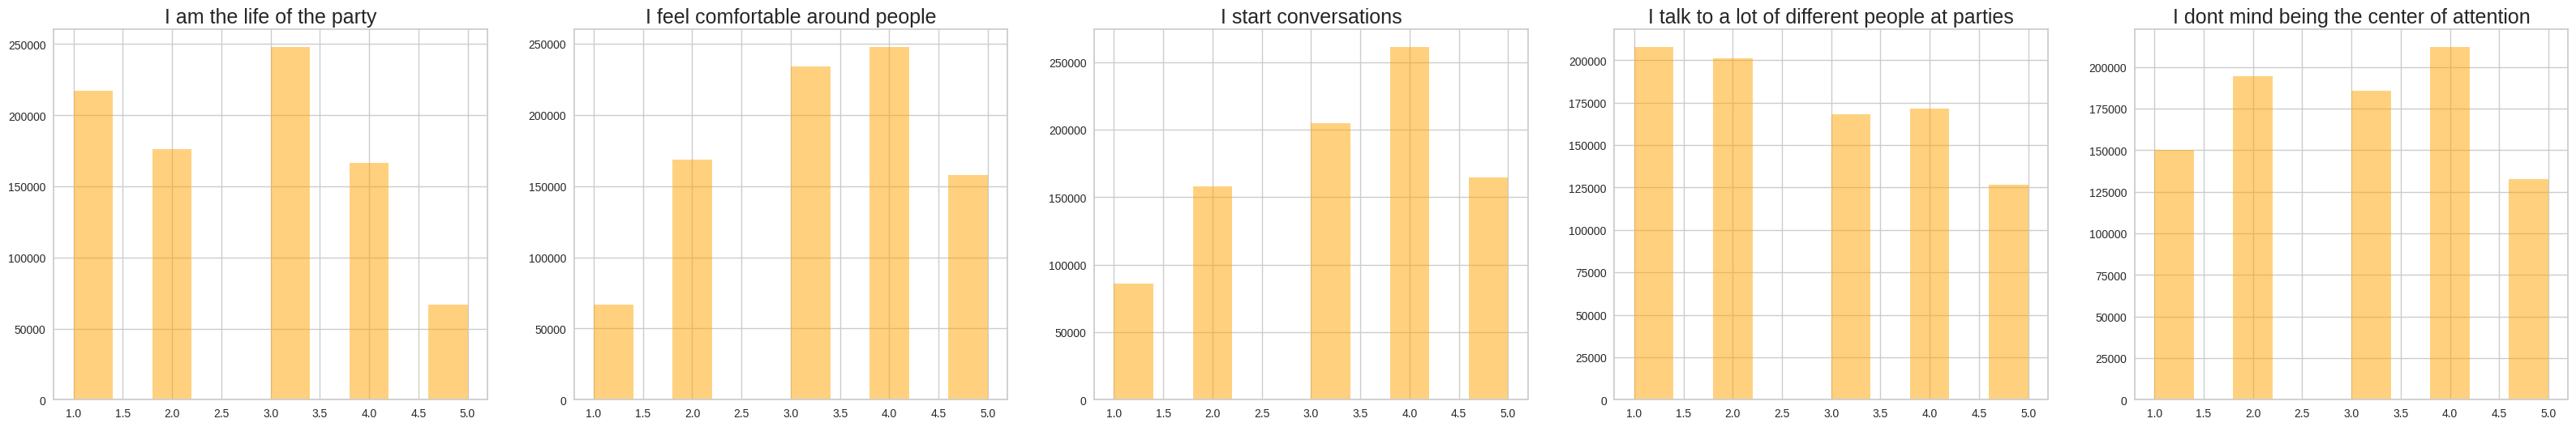

In [196]:
print('Q&As Related to Extraversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism/Emotional Stability Personality


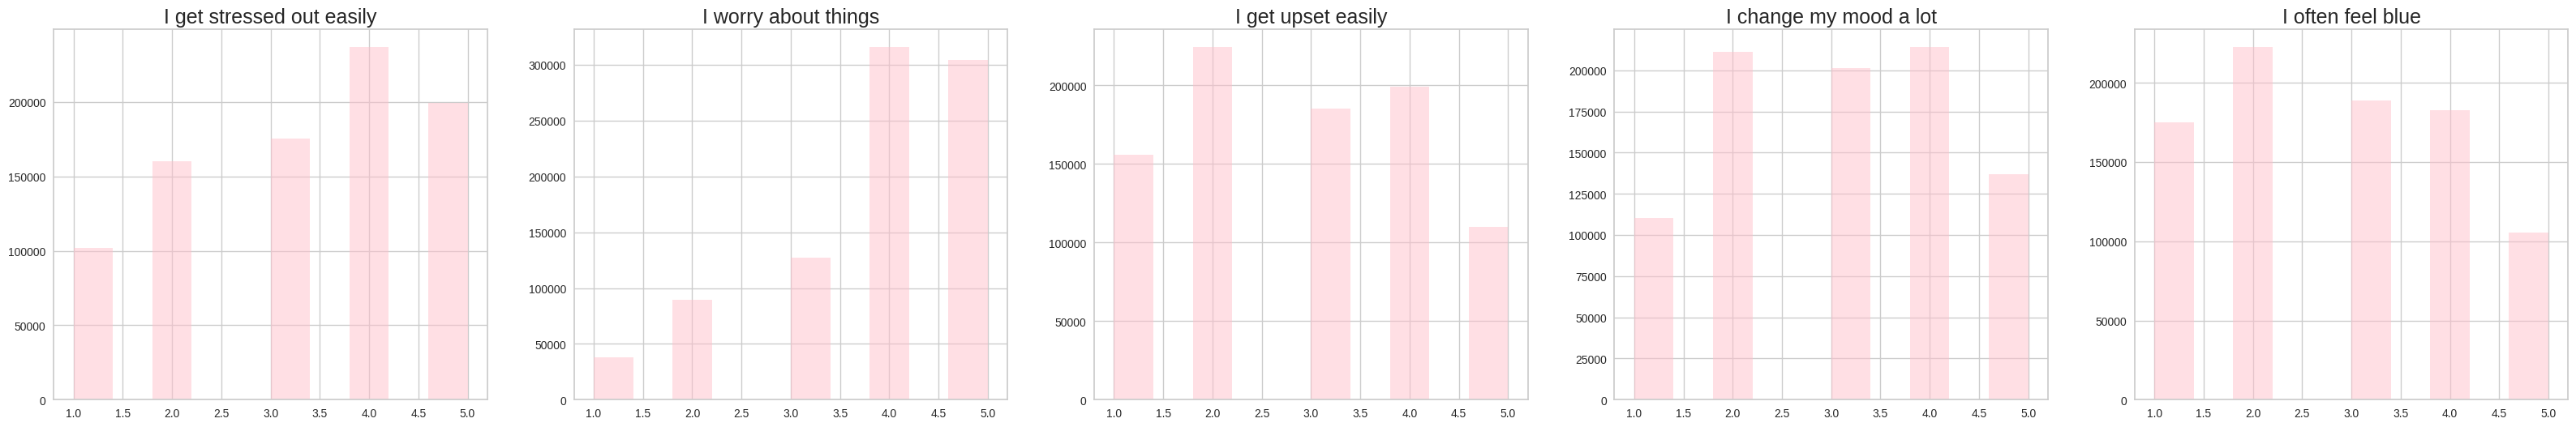

In [197]:
print('Q&As Related to Neuroticism/Emotional Stability Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


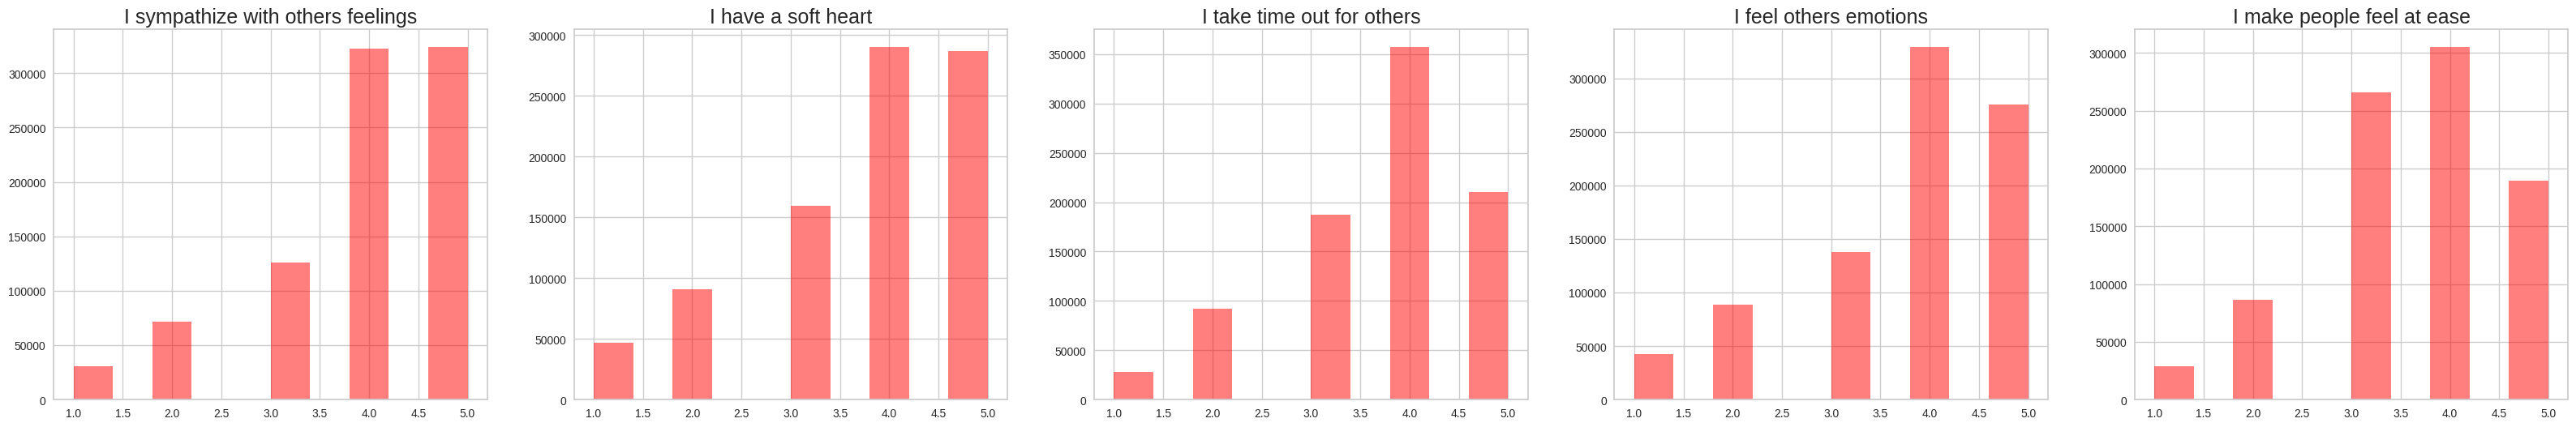

In [198]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


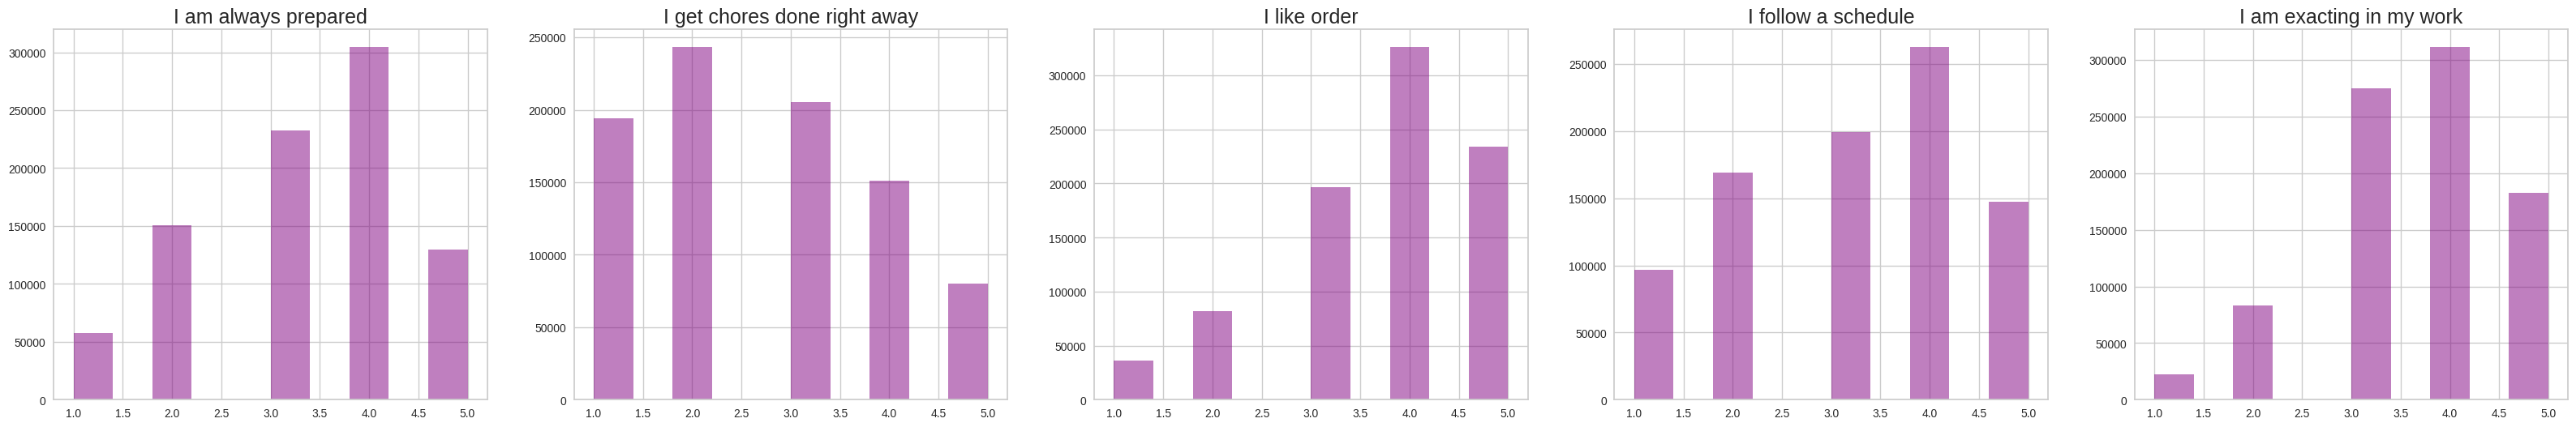

In [199]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


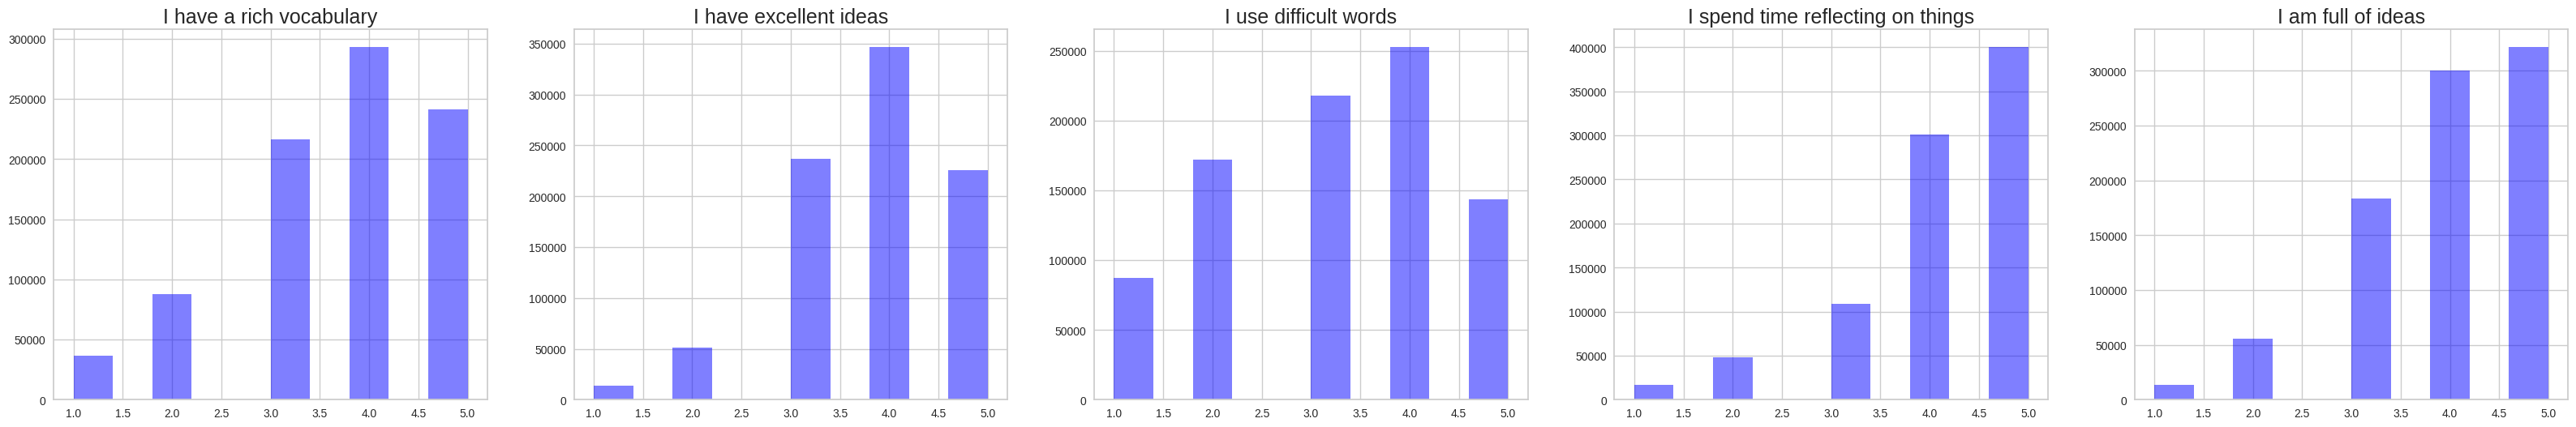

In [200]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

# Clustering

In [201]:
df_sample = quest_df[:5000]

In [202]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 

df_ = df_sample.copy()
mm = MinMaxScaler()
for col in df_.columns:
    df_[col] = mm.fit_transform(df_[[col]])
df_.head()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,0.75,1.00,1.00,1.00,0.75,0.00,0.75,0.25,0.25,0.25,0.75,0.50,0.75,0.50,0.75,0.50,0.25,0.75,0.75,0.75,1.00,0.75,0.50,0.75,1.00
1,0.50,0.50,0.50,0.25,0.00,0.25,0.75,0.00,0.25,0.00,1.00,1.00,0.75,1.00,0.50,0.50,0.50,0.50,1.00,0.50,0.00,0.50,0.25,1.00,0.50
2,0.25,0.75,0.50,0.00,0.25,0.75,0.75,0.25,0.25,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.50,0.75,0.75,0.25,1.00,0.75,0.50,0.75,0.75
3,0.25,0.25,0.75,0.25,0.00,0.50,0.50,0.25,0.25,0.50,0.75,0.75,0.75,0.50,0.75,0.25,0.00,0.25,0.00,0.75,0.75,0.50,0.75,0.50,0.50
4,0.50,0.50,1.00,0.50,0.50,0.00,1.00,0.00,0.00,0.25,1.00,0.50,1.00,1.00,0.50,1.00,0.50,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

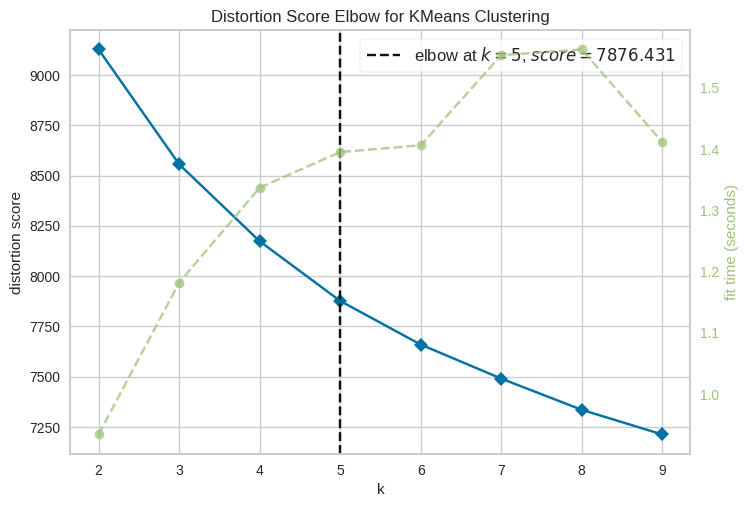

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_)
visualizer.poof()

In [204]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [205]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_sample['Clusters'] = predictions
df_sample.head()

<ipython-input-205-cdf17c5fac23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Clusters'] = predictions


,EXT1,EXT3,EXT5,EXT7,EXT9,...,OPN5,OPN8,OPN9,OPN10,Clusters
0,4.0,5.0,5.0,5.0,4.0,...,4.0,3.0,4.0,5.0,1
1,3.0,3.0,3.0,2.0,1.0,...,3.0,2.0,5.0,3.0,2
2,2.0,4.0,3.0,1.0,2.0,...,4.0,3.0,4.0,4.0,2
3,2.0,2.0,4.0,2.0,1.0,...,3.0,4.0,3.0,3.0,4
4,3.0,3.0,5.0,3.0,3.0,...,5.0,3.0,5.0,5.0,1


In [206]:
df_sample.Clusters.value_counts()

3    1144
1    1047
2    1025
0    1012
4     772
Name: Clusters, dtype: int64

In [207]:
pd.options.display.max_columns = 150
df_sample.groupby('Clusters').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.645257,2.176877,2.293478,1.613636,2.025692,4.262846,4.574111,3.846838,3.873518,3.982213,3.904150,3.814229,3.454545,3.718379,2.939723,2.869565,1.988142,3.597826,2.751976,3.334980,3.665020,3.443676,3.241107,4.329051,3.731225
1,3.510984,4.383954,4.278892,3.943649,3.757402,2.261700,3.058262,1.881566,2.138491,1.657116,4.264565,3.911175,4.065903,4.118434,4.200573,3.654250,3.056351,3.821394,3.531996,3.851003,3.869150,4.140401,3.255969,3.957975,4.267431
2,2.093659,3.278049,3.066341,2.211707,2.330732,3.491707,4.139512,2.910244,2.773659,2.456585,4.317073,4.170732,3.982439,4.092683,3.650732,3.861463,3.317073,4.173659,3.973659,3.874146,3.247805,3.517073,2.619512,4.028293,3.505366
3,3.427448,3.825175,4.084790,3.685315,3.793706,3.916958,4.348776,3.578671,3.837413,3.312937,4.228147,4.059441,3.929196,4.228147,3.932692,3.041084,2.272727,3.506993,2.978147,3.534091,3.880245,3.918706,3.548077,4.234266,4.169580
4,2.244819,2.858808,2.638601,2.234456,2.809585,2.507772,3.108808,2.055699,2.542746,2.398964,2.836788,2.562176,2.887306,2.615285,3.067358,3.198187,2.282383,3.463731,2.699482,3.448187,3.784974,3.765544,3.272021,3.772021,3.805699


In [208]:
# Average Each Personality. Each personality have 5 question
def avg_each_question(column_name, df_sample, column_list):
    avg_data = pd.DataFrame()
    for i in range(0, 21, 5):
        avg_data[column_name[int(i/5)]] = df_sample[column_list[i:i+5]].sum(axis=1)/5
        
    return avg_data

In [209]:
column_list = list(df_sample)
column_name = ['Extroversion', 'Neurotic', 'Agreeable', 'Conscientious', 'Open']

result_avg = avg_each_question(column_name, df_sample, column_list)
result_avg['clusters'] = df_sample[list(df_sample)[-1:]]

# result_avg.groupby('clusters').mean()
result_avg

,Extroversion,Neurotic,Agreeable,Conscientious,Open,clusters
0,4.6,2.2,3.6,3.4,4.2,1
1,2.4,2.0,4.4,3.4,2.8,2
2,2.4,3.0,3.8,3.4,4.0,2
3,2.2,2.6,3.8,2.0,3.4,4
4,3.4,2.0,4.2,4.6,4.6,1
...,...,...,...,...,...,...
4995,3.4,4.8,4.4,3.2,4.0,3
4996,2.8,2.8,4.2,3.2,2.6,2
4997,4.4,2.8,3.6,3.8,4.6,1
4998,3.8,4.6,4.6,4.4,4.4,3


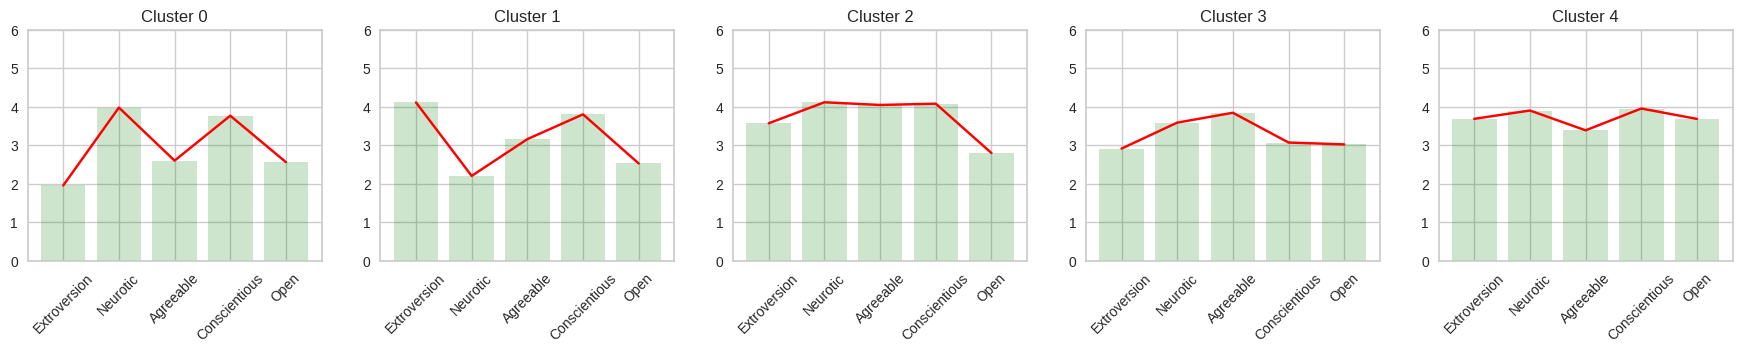

In [210]:
# Visualizing the means for each cluster
dataclusters = result_avg.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,6);

In [211]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

result_avg = result_avg.drop(['clusters'], axis=1)

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(result_avg)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca

,PCA1,PCA2,Clusters
0,-1.760786,0.333432,1
1,-0.190317,1.002036,2
2,0.305941,0.290002,2
3,0.665470,0.814150,4
4,-1.438094,0.474951,1
...,...,...,...
4995,0.298688,-1.751941,3
4996,0.031047,0.363785,2
4997,-1.457089,-0.167344,1
4998,-0.497203,-1.907604,3


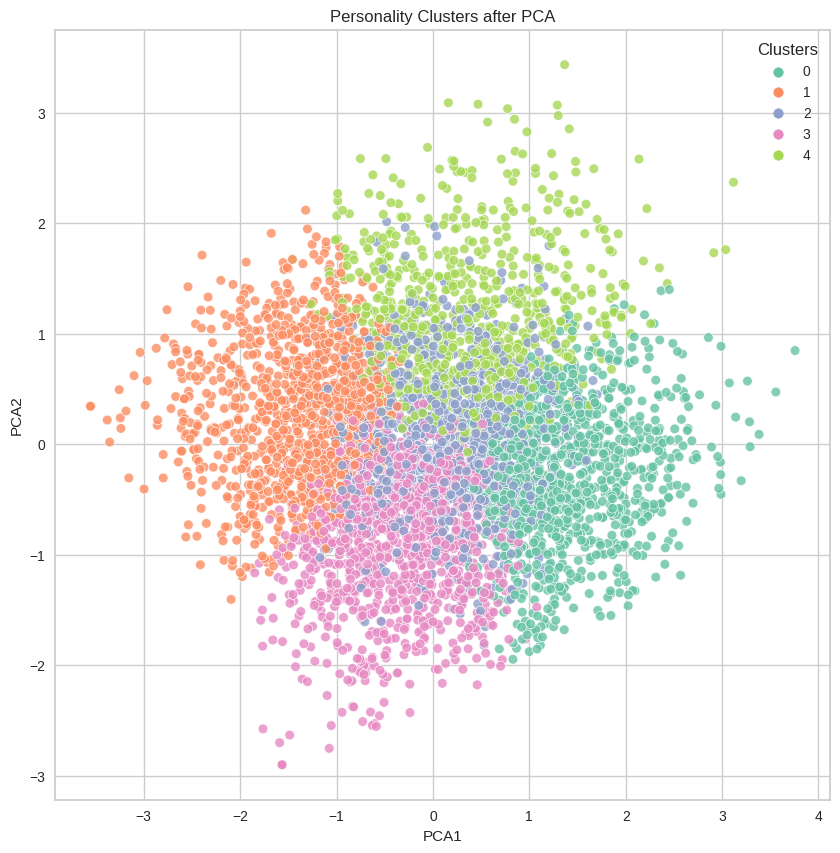

In [212]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [213]:
# my_data = [2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2]
# my_data = [5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5]
my_data = [5,2,4,5,4,2,1,1,3,1,5,1,3,5,5,1,5,2,5,5,1,5,2,5,5]
my_data = np.array(my_data).reshape(1, -1)

In [214]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
